In [1]:
import numpy as np
import cv2
from IPython.display import Markdown, display
import matplotlib.pyplot as plt


Markdown(r'# LEC 5: Spatial Filtering')

# LEC 5: Spatial Filtering

In [2]:
display(Markdown(r'## Example 1'))
display(Markdown(r'$a = 1-2j \Rightarrow \bar{a} = 1+2j $'))
display(Markdown(r'$b = -4+5j \Rightarrow  |b| = \sqrt{4^{2}+5^{2}} = %g $' % np.abs(-4+5j)))
display(Markdown(r'$ c = a \cdot b = (1-2j)(-4+5j) = %s $' % str((1-2j)*(-4+5j))))

## Example 1

$a = 1-2j \Rightarrow \bar{a} = 1+2j $

$b = -4+5j \Rightarrow  |b| = \sqrt{4^{2}+5^{2}} = 6.40312 $

$ c = a \cdot b = (1-2j)(-4+5j) = (6+13j) $

In [3]:
display(Markdown(r'## Example 2'))
display(Markdown(r'### Polar representation of $ -2-3j = |-2-3j|e^{j\arctan{\frac{-3}{-2}}} = %g e^{%gj} $ ' % (np.abs(-2-3j) , np.angle(-2-3j))))
display(Markdown(r'### Cartesian representation of $ 5e^{-3j} = 5(\cos(-3) + j \sin(-3)) = %s $' % str(5*np.exp(-3j))))


## Example 2

### Polar representation of $ -2-3j = |-2-3j|e^{j\arctan{\frac{-3}{-2}}} = 3.60555 e^{-2.1588j} $ 

### Cartesian representation of $ 5e^{-3j} = 5(\cos(-3) + j \sin(-3)) = (-4.949962483002227-0.7056000402993361j) $

In [4]:
display(Markdown(r'## Example 3'))

display(Markdown(r'### $ \int_{-\infty}^{\infty} (2t^{2}+1)\delta(t)dt = (2(0)+1)\cdot1 = 1 $'))
display(Markdown(r'### $ \int_{-\infty}^{\infty} \sin({2 \pi t}) \delta(t - 1)dt = sin({2 \pi}) = 0 $'))
display(Markdown(r"### $ \sum_{-\infty}^{\infty} 3e^{- \pi x} \delta(x+ \frac{1}{2}) = 3e^{0}1 = 3 $"))
display(Markdown(r"### $ \sum_{-\infty}^{\infty} \cos ({2 \pi x + \frac{\pi}{2}}) \delta ({x+ \frac{1}{2}}) = \cos({2 \pi x + \frac{ \pi}{2}})|_{x = - \frac{1}{2}} = \cos ({- \frac{ \pi}{2}}) = 0 $"))

## Example 3

### $ \int_{-\infty}^{\infty} (2t^{2}+1)\delta(t)dt = (2(0)+1)\cdot1 = 1 $

### $ \int_{-\infty}^{\infty} \sin({2 \pi t}) \delta(t - 1)dt = sin({2 \pi}) = 0 $

### $ \sum_{-\infty}^{\infty} 3e^{- \pi x} \delta(x+ \frac{1}{2}) = 3e^{0}1 = 3 $

### $ \sum_{-\infty}^{\infty} \cos ({2 \pi x + \frac{\pi}{2}}) \delta ({x+ \frac{1}{2}}) = \cos({2 \pi x + \frac{ \pi}{2}})|_{x = - \frac{1}{2}} = \cos ({- \frac{ \pi}{2}}) = 0 $

In [5]:
display(Markdown(r'## Example 4'))

#solve fourie transform of rectangular pulse in markdown
s = r'## $ F(\omega) = \frac{1}{2 \pi} \int_{-\infty}^{\infty} f(t) e^{-j \omega t}dt = \frac{1}{2 \pi} \int_{0}^{T} A\cdot e^{-j \omega t}dt $'
s += r' $ = \frac{A}{-2j \pi \omega} e^{-j \omega t}|_{0}^{T} = \frac{A}{-2j \pi \omega} [e^{-j \omega T} - e^{0}] \\ $'
s += r' $ = \frac{A}{-2j \pi \omega} [e^{-j \omega T} - 1] = \frac{A \cdot e^{-j \omega \frac{T}{2}}}{-2j \pi \omega} [e^{-j \omega \frac{T}{2}} - e^{+j \omega \frac{T}{2}} ] $ '
s += r' $ = \frac{A\cdot e^{-j \omega \frac{T}{2}}}{\pi \omega} \sin(\frac{\omega T}{2}) = \frac{AT\cdot e^{j \omega \frac{T}{2}}}{2 \pi} \cdot \frac{\sin(\frac{\omega T}{2})}{\frac{\omega T}{2}} \Rightarrow \\$'
s += r' $ F( \omega ) =  \frac{AT\cdot e^{j \omega \frac{T}{2}}}{2 \pi} sinc(\frac{\omega T}{2}) $'

display(Markdown(s))


## Example 4

## $ F(\omega) = \frac{1}{2 \pi} \int_{-\infty}^{\infty} f(t) e^{-j \omega t}dt = \frac{1}{2 \pi} \int_{0}^{T} A\cdot e^{-j \omega t}dt $ $ = \frac{A}{-2j \pi \omega} e^{-j \omega t}|_{0}^{T} = \frac{A}{-2j \pi \omega} [e^{-j \omega T} - e^{0}] \\ $ $ = \frac{A}{-2j \pi \omega} [e^{-j \omega T} - 1] = \frac{A \cdot e^{-j \omega \frac{T}{2}}}{-2j \pi \omega} [e^{-j \omega \frac{T}{2}} - e^{+j \omega \frac{T}{2}} ] $  $ = \frac{A\cdot e^{-j \omega \frac{T}{2}}}{\pi \omega} \sin(\frac{\omega T}{2}) = \frac{AT\cdot e^{j \omega \frac{T}{2}}}{2 \pi} \cdot \frac{\sin(\frac{\omega T}{2})}{\frac{\omega T}{2}} \Rightarrow \\$ $ F( \omega ) =  \frac{AT\cdot e^{j \omega \frac{T}{2}}}{2 \pi} sinc(\frac{\omega T}{2}) $

In [6]:
display(Markdown(r'## Example 5: DFT implementation'))

def print_array(arr, precision=2):
    return ', '.join([f"{i:.{precision}f}" for i in arr])


M = 10
f = np.arange(0, M).astype(np.complex128)
F_fourie = np.zeros(M, dtype= np.complex128)
for u in range(M):
    for x in range(M):
        F_fourie[u] += f[x]*np.exp(2*np.pi*u*x*complex(0, -1)/M)



display(Markdown(f"$ f(x) = {print_array(f, 2)} $ "))
display(Markdown(f"$ F(u) = {print_array(F_fourie, 2)} $ "))

## Example 5: DFT implementation

$ f(x) = 0.00+0.00j, 1.00+0.00j, 2.00+0.00j, 3.00+0.00j, 4.00+0.00j, 5.00+0.00j, 6.00+0.00j, 7.00+0.00j, 8.00+0.00j, 9.00+0.00j $ 

$ F(u) = 45.00+0.00j, -5.00+15.39j, -5.00+6.88j, -5.00+3.63j, -5.00+1.62j, -5.00-0.00j, -5.00-1.62j, -5.00-3.63j, -5.00-6.88j, -5.00-15.39j $ 

In [7]:
display(Markdown(r'## Example 5: inverse DFT implementation'))

f_fourie = np.zeros(M, dtype= np.complex128)
for x in range(M):
    for u in range(M):
        f_fourie[x] += F_fourie[u]*np.exp(2*np.pi*u*x*complex(0, 1)/M)/M

display(Markdown(f"$ F(u) = {print_array(F_fourie, 2)} \Rightarrow $ "))
display(Markdown(f"$ f(x) = {print_array(f_fourie, 2)} $ "))

## Example 5: inverse DFT implementation

$ F(u) = 45.00+0.00j, -5.00+15.39j, -5.00+6.88j, -5.00+3.63j, -5.00+1.62j, -5.00-0.00j, -5.00-1.62j, -5.00-3.63j, -5.00-6.88j, -5.00-15.39j \Rightarrow $ 

$ f(x) = -0.00+0.00j, 1.00+0.00j, 2.00-0.00j, 3.00-0.00j, 4.00+0.00j, 5.00-0.00j, 6.00-0.00j, 7.00+0.00j, 8.00+0.00j, 9.00-0.00j $ 

In [8]:
display(Markdown(r'## Example 5: numpy DFT implementation'))

F_fft = np.fft.fft(f)
f_ifft = np.fft.ifft(F_fft)
# f_ifft = np.
display(Markdown(f"$ F(u) = {print_array(F_fft, 2)} \Rightarrow $ "))
display(Markdown(f"$ f(x) = {print_array(f_ifft, 2)} $ "))

## Example 5: numpy DFT implementation

$ F(u) = 45.00+0.00j, -5.00+15.39j, -5.00+6.88j, -5.00+3.63j, -5.00+1.62j, -5.00-0.00j, -5.00-1.62j, -5.00-3.63j, -5.00-6.88j, -5.00-15.39j \Rightarrow $ 

$ f(x) = 0.00+0.00j, 1.00+0.00j, 2.00+0.00j, 3.00-0.00j, 4.00-0.00j, 5.00+0.00j, 6.00-0.00j, 7.00-0.00j, 8.00+0.00j, 9.00+0.00j $ 

In [9]:
display(Markdown(r'## Example 5: DFT comparison'))

display(Markdown(r'$ f(x) - f_{fourie(x)} = %s $' % print_array(f - f_fourie, 2)))
display(Markdown(r"$ f_{fourie}(x) - f_{fft}(x) = %s $ " % print_array(f_fourie - f_ifft, 2)))
display(Markdown(r"$ F_{fourie}(u) - F_{fft}(u) = %s $ " % print_array(F_fourie - F_fft, 2)))

display(Markdown(r'##### all functions are invertible and matching the numpy implementation'))

## Example 5: DFT comparison

$ f(x) - f_{fourie(x)} = 0.00-0.00j, -0.00-0.00j, -0.00+0.00j, 0.00+0.00j, -0.00-0.00j, -0.00+0.00j, 0.00+0.00j, 0.00-0.00j, -0.00-0.00j, 0.00+0.00j $

$ f_{fourie}(x) - f_{fft}(x) = -0.00+0.00j, 0.00+0.00j, 0.00-0.00j, -0.00-0.00j, 0.00+0.00j, 0.00-0.00j, -0.00-0.00j, -0.00+0.00j, 0.00+0.00j, -0.00-0.00j $ 

$ F_{fourie}(u) - F_{fft}(u) = 0.00+0.00j, -0.00+0.00j, -0.00+0.00j, -0.00+0.00j, -0.00-0.00j, 0.00-0.00j, 0.00-0.00j, -0.00+0.00j, 0.00-0.00j, 0.00+0.00j $ 

##### all functions are invertible and matching the numpy implementation

In [10]:
from plotly import graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

np.seterr(all='ignore')

M = 100
x = np.arange(0, M)
u = np.arange(0, M)

fig = make_subplots(1, 2, subplot_titles=("Real", "Imaginary"))
headings = []

for step in np.arange(0, M, 1):
    f = np.exp(-2j*np.pi*u[step]*x/M)
    freq = u[step] / M
    wavelength = 1 / freq
    headings.append(f"u = {u[step]}, freq = {freq},  wavelength = {wavelength}")
    fig.add_trace(
        go.Scatter(
            visible=False,
            line=dict(color="#00CED1", width=6),
            x=x,
            y=np.real(f))
        , row=1, col=1)
    fig.add_trace(
        go.Scatter(
            visible=False,
            line=dict(color="#00CED1", width=6),
            x=x,
            y=np.imag(f))
        , row=1, col=2)

fig.data[20].visible = True
fig.data[21].visible = True

# Create and add slider
steps = []
for i in range(M):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": headings[i] }],  # layout attribute
    )
    # print(step["args"])
    step["args"][0]["visible"][i*2] = True  # Toggle i'th trace to "visible"
    step["args"][0]["visible"][i*2+1] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=10,
    pad={"t": 0, 'b': 0, 'l': 0, 'r': 0},
    steps=steps
)]

#remove padding and margin and no legend
fig.update_layout(
    sliders=sliders
    , margin=dict(l=25, r=25, t=50, b=25)
    # , paper_bgcolor='rgba(0,0,0,0)'
    # , plot_bgcolor='rgba(0,0,0,0)'
    , showlegend=False
    , template="plotly_dark"
)
fig.show(config = {'staticPlot': True})

In [11]:
import pandas as pd
display(Markdown(r'## Example 7'))

M = 20
f1 = np.random.randint(0, 255, M)
f2 = np.random.randint(0, 255, M)
a = np.random.randint(0, 10)
b = np.random.randint(0, 10)

display(Markdown(r'$ f_1(x) = %s $' % print_array(f1, 0)))
display(Markdown(r'$ f_2(x) = %s $' % print_array(f2, 0)))
display(Markdown(r'$ a = %g $' % a))
display(Markdown(r'$ b = %g $' % b))

F1 = np.fft.fft(f1)
F2 = np.fft.fft(f2)
Fab = np.fft.fft(f1*a + f2*b)
diffrence = np.abs(Fab - (a*F1 + b*F2))
diffrence = pd.Series(diffrence)

display(Markdown(r'$ |F_{ab}(u) - (aF_1(u) + bF_2(u))| = %s $' % print_array(diffrence, 2)))

display(diffrence.describe())

display(Markdown(r'##### diffrence is zero within the numerical precision'))
display(Markdown(r'##### using lemma : $ \sum a\cdot f(x) = a\cdot \sum f(x) \rightarrow $ '))
display(Markdown(r'##### can be proven that : $ F\{ a \cdot f_{1}(x) \} + F\{ b \cdot f_{2}(x) \} = F\{ a \cdot f_{1}(x) + b \cdot f_{2}(x) \} $'))


## Example 7

$ f_1(x) = 136, 127, 180, 45, 177, 242, 132, 68, 93, 34, 249, 78, 84, 34, 117, 249, 128, 181, 103, 85 $

$ f_2(x) = 239, 226, 9, 99, 177, 21, 229, 117, 218, 161, 40, 206, 64, 14, 95, 221, 14, 129, 136, 52 $

$ a = 5 $

$ b = 7 $

$ |F_{ab}(u) - (aF_1(u) + bF_2(u))| = 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00 $

count    2.000000e+01
mean     3.991722e-13
std      3.110690e-13
min      0.000000e+00
25%      2.273737e-13
50%      3.215549e-13
75%      5.018380e-13
max      9.374857e-13
dtype: float64

##### diffrence is zero within the numerical precision

##### using lemma : $ \sum a\cdot f(x) = a\cdot \sum f(x) \rightarrow $ 

##### can be proven that : $ F\{ a \cdot f_{1}(x) \} + F\{ b \cdot f_{2}(x) \} = F\{ a \cdot f_{1}(x) + b \cdot f_{2}(x) \} $

## Example 8

<Figure size 640x480 with 0 Axes>

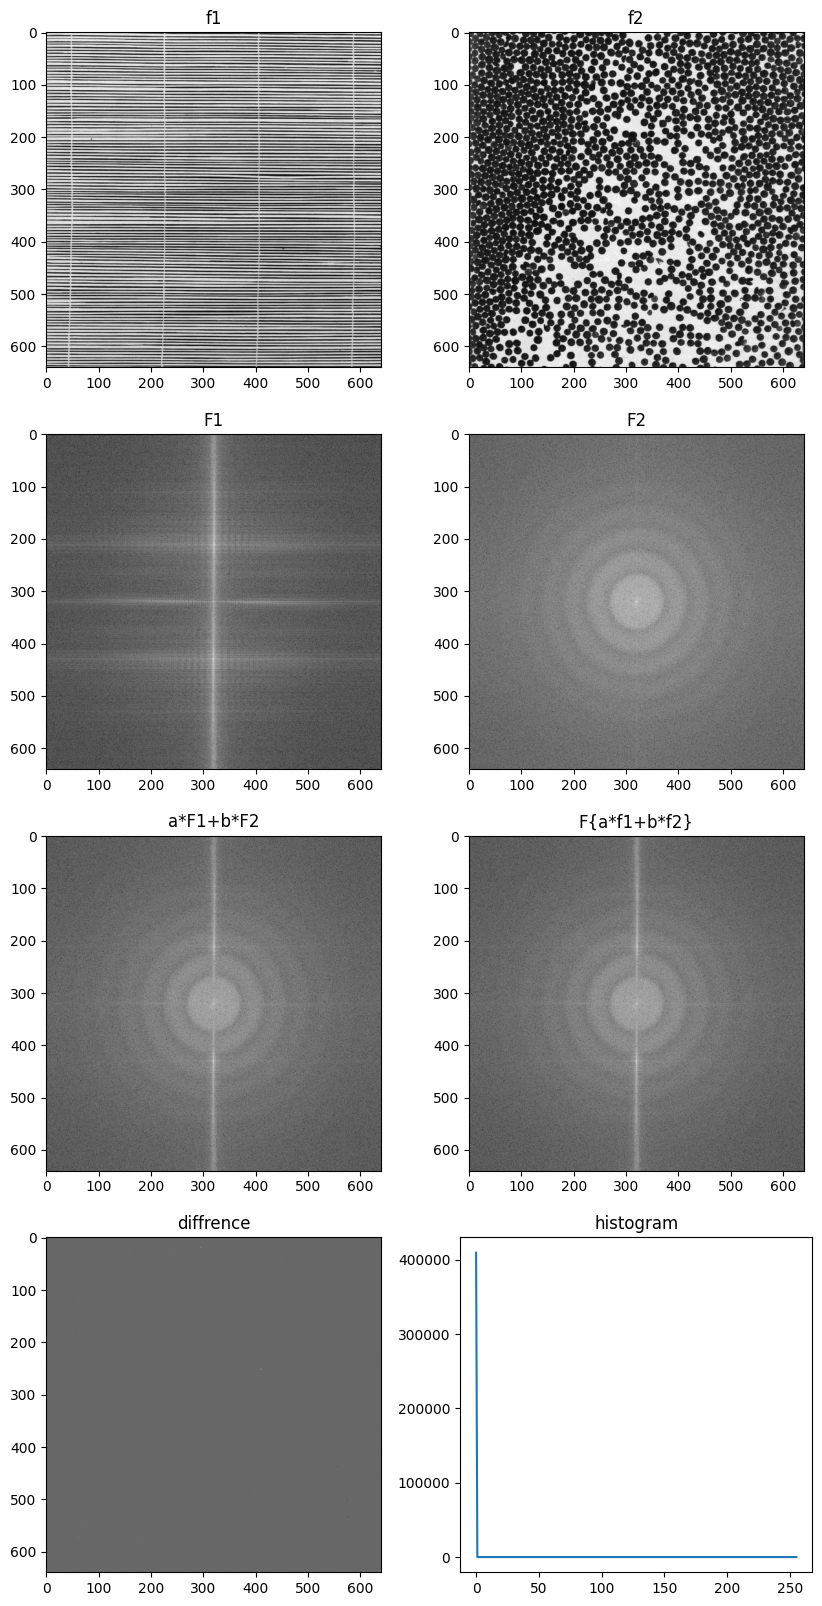

In [12]:
%matplotlib inline
display(Markdown(r'## Example 8'))

from PIL import Image

def plot_ff(F):
    return np.log(np.abs(np.fft.fftshift(F)))

#read gif image
def read_gif(path):
    im = Image.open(path)
    images = []
    try:
        while True:
            images.append(np.array(im))
            im.seek(len(images))
    except EOFError:
        pass
    return np.array(images)


a = 2
b = 2

f1 = read_gif('D49.gif')[0].astype(np.float64)
f2 = read_gif('D67.gif')[0].astype(np.float64)
F1 = np.fft.fft2(f1)
F2 = np.fft.fft2(f2)

plt.clf()
_, ax = plt.subplots(4, 2, figsize=(10, 20))
ax = ax.flatten()

ax[0].imshow(f1, cmap='gray')
ax[0].set_title('f1')
ax[1].imshow(f2, cmap='gray')
ax[1].set_title('f2')

ax[2].imshow(plot_ff(F1), cmap='gray')
ax[2].set_title('F1')
ax[3].imshow(plot_ff(F2), cmap='gray')
ax[3].set_title('F2')

ax[4].imshow(plot_ff(a*F1+b*F2), cmap='gray')
ax[4].set_title('a*F1+b*F2')

ax[5].imshow(plot_ff(np.fft.fft2(a*f1+b*f2)), cmap='gray')
ax[5].set_title('F{a*f1+b*f2}')

c = plot_ff(a*F1+b*F2) - plot_ff(np.fft.fft2(a*f1+b*f2))
ax[6].imshow(c, cmap='gray')
ax[6].set_title('diffrence')


hist = cv2.calcHist([c.astype(np.uint8)], [0], None, [256], [0, 256])
ax[7].plot(hist)
ax[7].set_title('histogram')

plt.show()

## Example 9

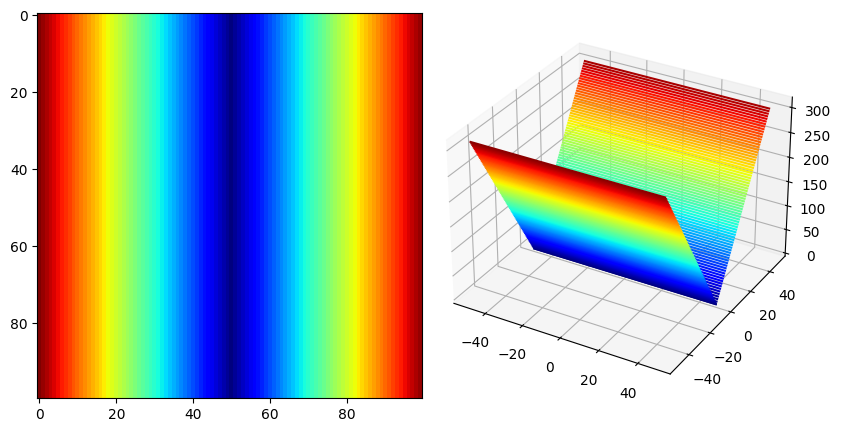

In [13]:
display(Markdown(r'## Example 9'))

M = 100
N = 100

u,v = np.meshgrid(np.arange(-M/2, M/2), np.arange(-N/2, N/2))
Hx = 2j*np.pi*u
Habs = np.abs(Hx)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(Habs, cmap='jet')

ax[1].axis('off')
ax[1] = fig.add_subplot(122, projection='3d')
ax[1].contour3D(v, u, Habs, 100, cmap='jet')

fig.subplots_adjust(hspace=5,wspace=0)
plt.show()

## Example 10 - Fourie Transform properties

1. $ if f(x,y) \in R \Rightarrow F^{*}(u, v) = F(-u, -v) $

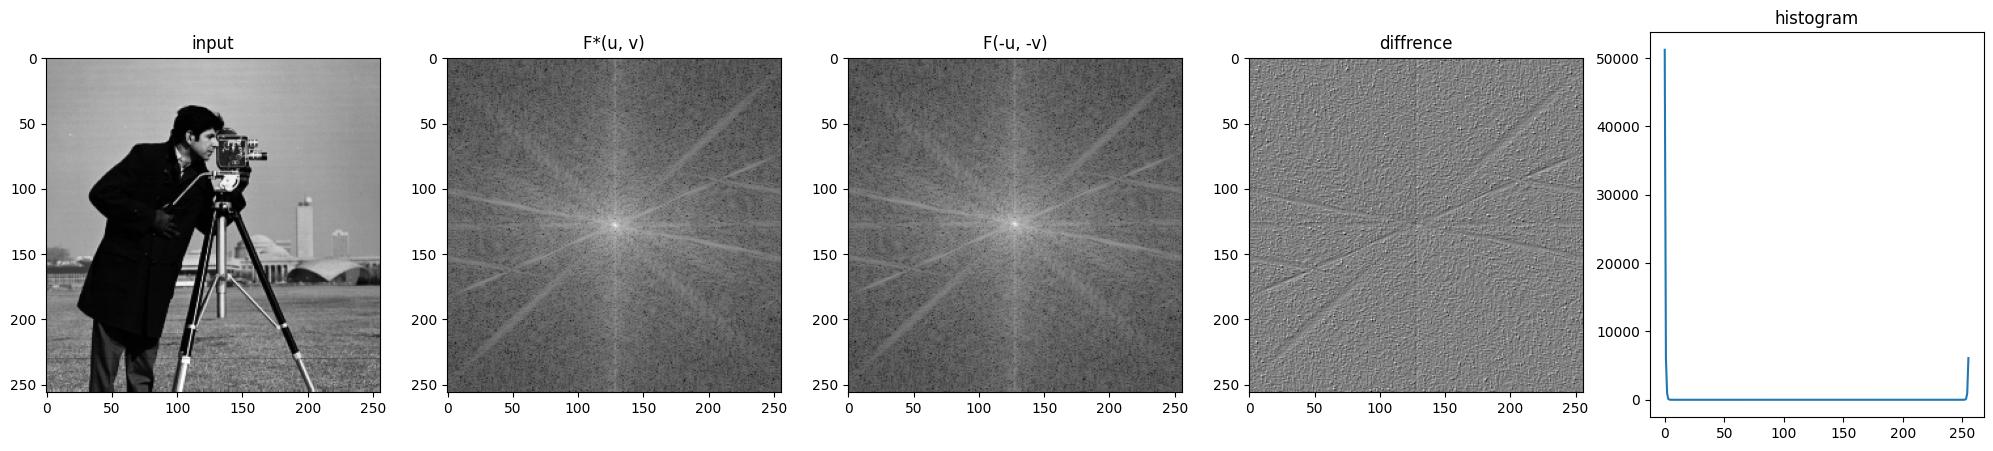

In [14]:
display(Markdown(r'## Example 10 - Fourie Transform properties'))

display(Markdown('1. $ if f(x,y) \in R \Rightarrow F^{*}(u, v) = F(-u, -v) $'))

img = cv2.imread('cameraman.tif', cv2.IMREAD_GRAYSCALE).astype(np.complex128)

Fstar = np.conjugate(np.fft.fft2(img))
F_flip = np.flip(np.flip(np.fft.fft2(img), 0), 1)


# plt.clf()
_, ax = plt.subplots(1, 5, figsize=(25, 5))

ax[0].imshow(np.real(img), cmap='gray')
ax[0].set_title('input')

ax[1].imshow(plot_ff(Fstar), cmap='gray')
ax[1].set_title('F*(u, v)')

ax[2].imshow(plot_ff(F_flip), cmap='gray')
ax[2].set_title('F(-u, -v)')

diff = plot_ff(Fstar) - plot_ff(F_flip)
ax[3].imshow(diff, cmap='gray')
ax[3].set_title('diffrence')

hist = cv2.calcHist([diff.astype(np.uint8)], [0], None, [256], [0, 256])
ax[4].plot(hist)
ax[4].set_title('histogram')

plt.show()

2. $ if f(x,y) \in I \Rightarrow F^{*}(-u, -v) = -F(u, v) $

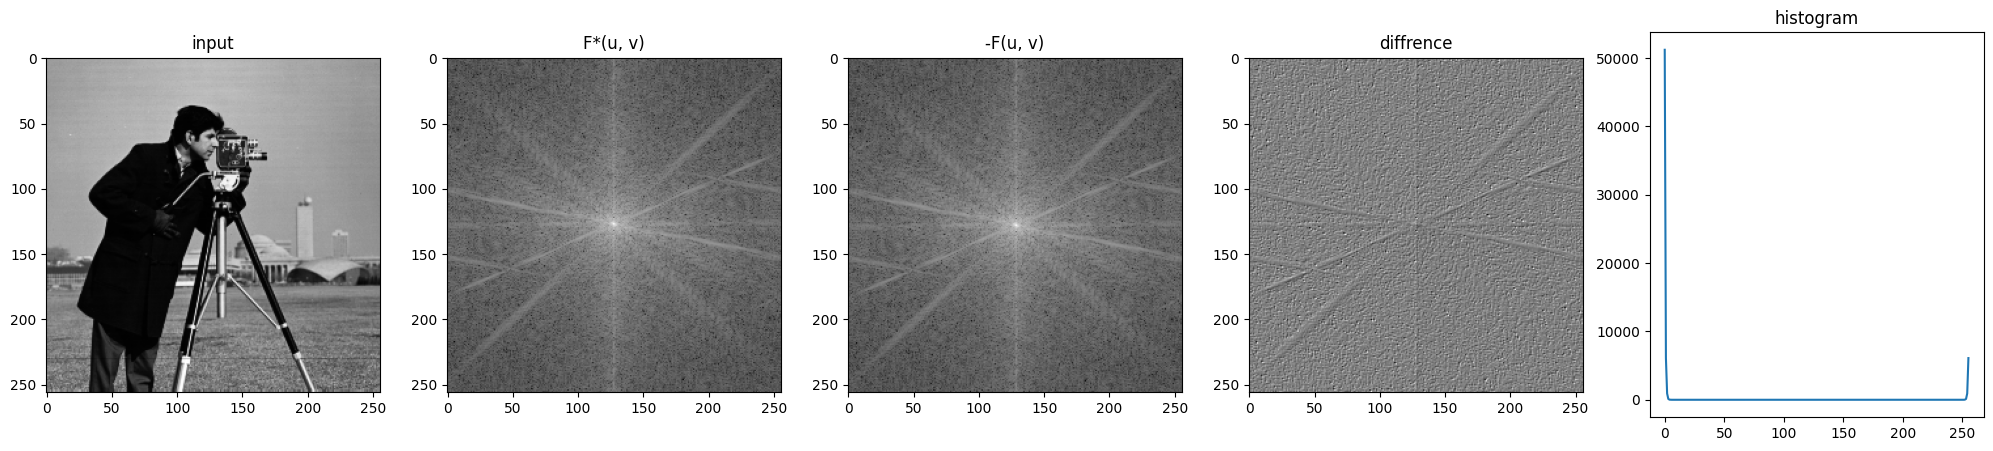

In [15]:
display(Markdown('2. $ if f(x,y) \in I \Rightarrow F^{*}(-u, -v) = -F(u, v) $'))

img = cv2.imread('cameraman.tif', cv2.IMREAD_GRAYSCALE).astype(np.complex128)*1j
Fstar_flip = np.flip(np.flip(np.conjugate(np.fft.fft2(img)), 0), 1)
F_inverse = -np.fft.fft2(img)

# plt.clf()
_, ax = plt.subplots(1, 5, figsize=(25, 5))

ax[0].imshow(np.imag(img), cmap='gray')
ax[0].set_title('input')

ax[1].imshow(plot_ff(Fstar_flip), cmap='gray')
ax[1].set_title('F*(u, v)')

ax[2].imshow(plot_ff(F_inverse), cmap='gray')
ax[2].set_title('-F(u, v)')

diff = plot_ff(Fstar_flip) - plot_ff(F_inverse)
ax[3].imshow(diff, cmap='gray')
ax[3].set_title('diffrence')

hist = cv2.calcHist([diff.astype(np.uint8)], [0], None, [256], [0, 256])
ax[4].plot(hist)
ax[4].set_title('histogram')

plt.show()

3. $ if f(x,y) \in R \Rightarrow R(F) :even \quad \& \quad I(F):odd $

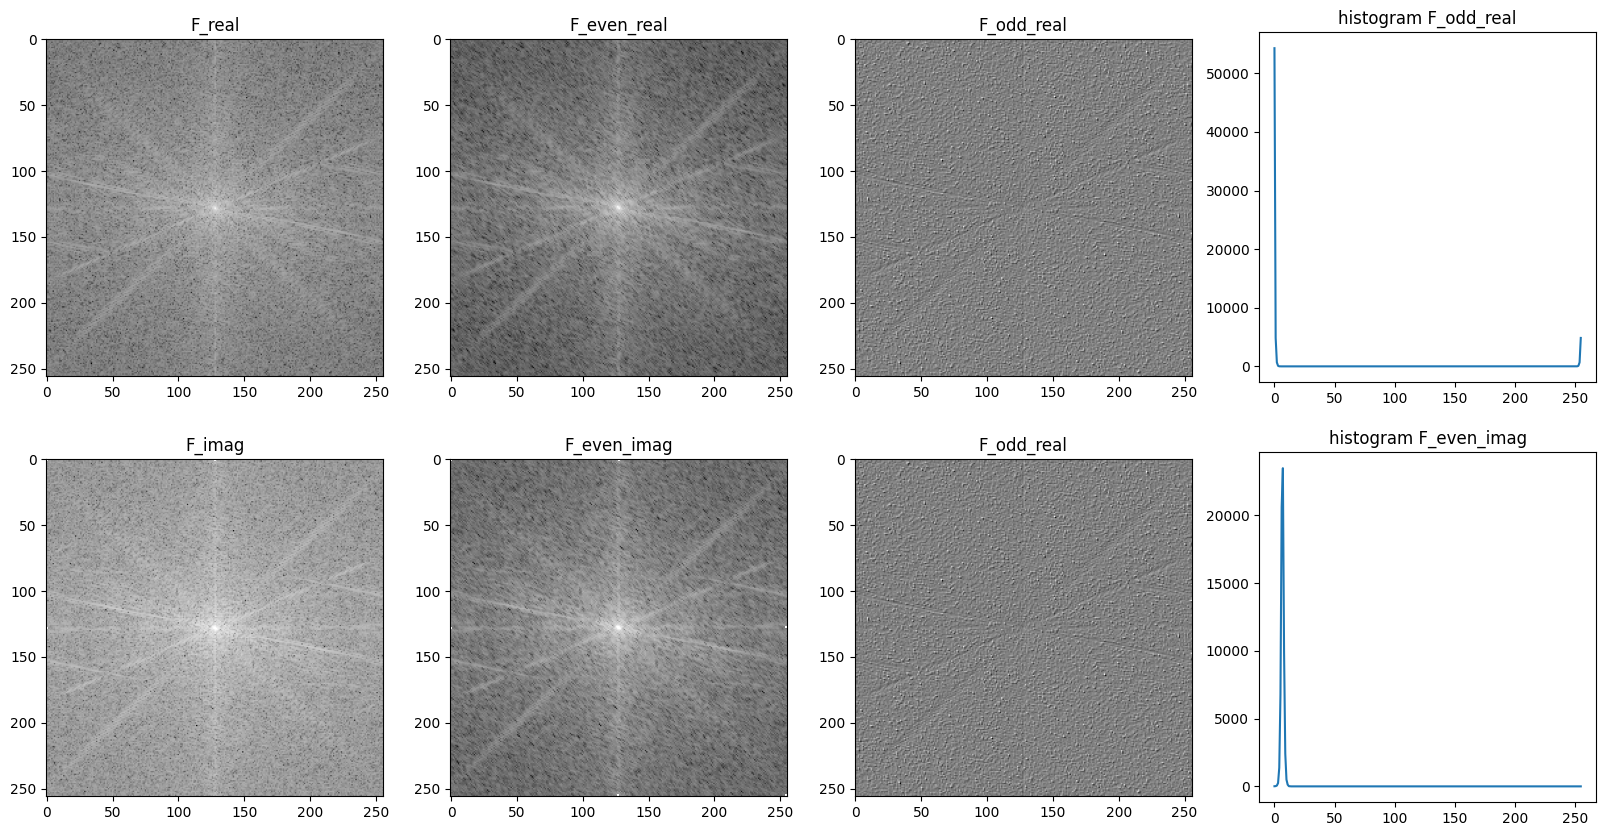

In [16]:
display(Markdown('3. $ if f(x,y) \in R \Rightarrow R(F) :even \quad \& \quad I(F):odd $'))

# get even component
def gec(img):
    return (img + np.flip(np.flip(img, 0), 1))/2

# get odd component
def goc(img):
    return (img - np.flip(np.flip(img, 0), 1))/2

img = cv2.imread('cameraman.tif', cv2.IMREAD_GRAYSCALE).astype(np.complex128)

F = np.fft.fft2(img)
F_real = np.real(F)
F_imag = np.imag(F)

F_even_real = gec(plot_ff(F_real))
F_odd_real = goc(plot_ff(F_real))
F_even_imag = gec(plot_ff(F_imag))
F_odd_imag = goc(plot_ff(F_imag))

_, ax = plt.subplots(2, 4, figsize=(20, 10))

ax[0, 0].imshow(plot_ff(F_real), cmap='gray')
ax[0, 0].set_title('F_real')

ax[0, 1].imshow(F_even_real, cmap='gray')
ax[0, 1].set_title('F_even_real')

ax[0, 2].imshow(F_odd_real, cmap='gray')
ax[0, 2].set_title('F_odd_real')

ax[0, 3].plot(cv2.calcHist([F_odd_real.astype(np.uint8)], [0], None, [256], [0, 256]))
ax[0, 3].set_title('histogram F_odd_real')

ax[1, 0].imshow(plot_ff(F_imag), cmap='gray')
ax[1, 0].set_title('F_imag')

ax[1, 1].imshow(F_even_imag , cmap='gray')
ax[1, 1].set_title('F_even_imag')

ax[1, 2].imshow(F_odd_real , cmap='gray')
ax[1, 2].set_title('F_odd_real')

ax[1, 3].plot(cv2.calcHist([F_even_imag.astype(np.uint8)], [0], None, [256], [0, 256]))
ax[1, 3].set_title('histogram F_even_imag')

plt.show()